In [5]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/IMbank_텍스트마이닝/amazon_reviews_all.tsv',sep='\t')
df

,Review,Star
0,I use it and it shows your skin glow but your ...,1
1,If you are someone who regularly purges when t...,1
2,I tried so hard to like thus spray but unfortu...,1
3,This serum has artificial fragrance and theref...,1
4,First off I want to say I don’t have sensitive...,1
...,...,...
495,This was recommended by “ PAINTED BY SPENCER” ...,5
496,Deja un rico aroma y hidrata,5
497,It’s work very well I recommend it 🥰🥰🥰🥰 great ...,5
498,This really melts your makeup together as sett...,5


### 감성 분석

In [6]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon') # 감성사전 다운로드

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [7]:
def vader_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(text)['compound']
    return scores

df["Varder Score"]=df['Review'].apply(vader_sentiment) # 전처리 안하고 Varder score 계산
df

,Review,Star,Varder Score
0,I use it and it shows your skin glow but your ...,1,0.9386
1,If you are someone who regularly purges when t...,1,-0.6708
2,I tried so hard to like thus spray but unfortu...,1,-0.7326
3,This serum has artificial fragrance and theref...,1,0.3425
4,First off I want to say I don’t have sensitive...,1,0.2882
...,...,...,...
495,This was recommended by “ PAINTED BY SPENCER” ...,5,0.9062
496,Deja un rico aroma y hidrata,5,0.0000
497,It’s work very well I recommend it 🥰🥰🥰🥰 great ...,5,0.8508
498,This really melts your makeup together as sett...,5,0.4767


In [8]:
# Vader로 스코어를 해석할 때 0.05 , -0.05로 중립을 두는 것을 권장한다고함

# 감성 분석 결과를 판단하는 함수 정의
def sentiment_label(score):
    if score >= 0.05:  # 긍정
        return '긍정'
    elif score <= -0.05:  # 부정
        return '부정'
    else:
        return '중립'


df['감성분석결과'] = df['Varder Score'].apply(sentiment_label)

In [9]:
df

,Review,Star,Varder Score,감성분석결과
0,I use it and it shows your skin glow but your ...,1,0.9386,긍정
1,If you are someone who regularly purges when t...,1,-0.6708,부정
2,I tried so hard to like thus spray but unfortu...,1,-0.7326,부정
3,This serum has artificial fragrance and theref...,1,0.3425,긍정
4,First off I want to say I don’t have sensitive...,1,0.2882,긍정
...,...,...,...,...
495,This was recommended by “ PAINTED BY SPENCER” ...,5,0.9062,긍정
496,Deja un rico aroma y hidrata,5,0.0000,중립
497,It’s work very well I recommend it 🥰🥰🥰🥰 great ...,5,0.8508,긍정
498,This really melts your makeup together as sett...,5,0.4767,긍정


### 각 별점별 감성분석 시각화


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Review        500 non-null    object 
 1   Star          500 non-null    int64  
 2   Varder Score  500 non-null    float64
 3   감성분석결과        500 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


In [10]:
# 별점(Star)별 긍정과 부정 리뷰를 집계
sentiment_count = df.groupby(['Star', '감성분석결과']).size().unstack(fill_value=0)

# 별점별 긍정과 부정 리뷰 수 출력
sentiment_count

감성분석결과,긍정,부정,중립
Star,,,
1,36,45,19
2,42,34,24
3,59,28,13
4,81,9,10
5,74,5,21


In [19]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123621 files and direc

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

<Figure size 1000x600 with 0 Axes>

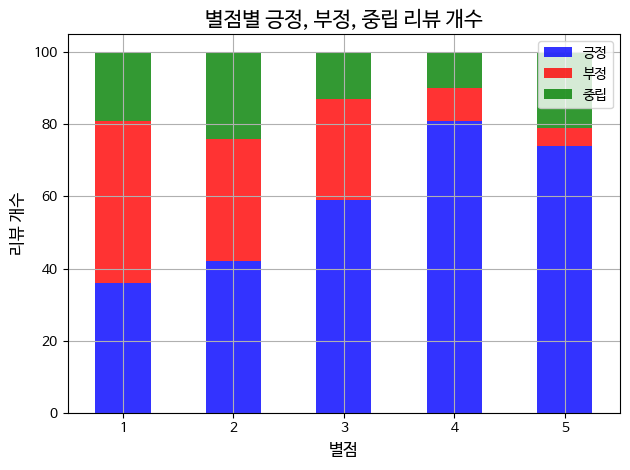

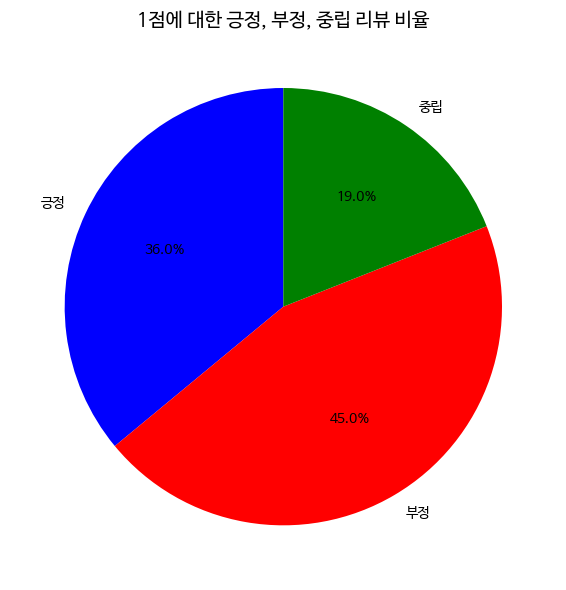

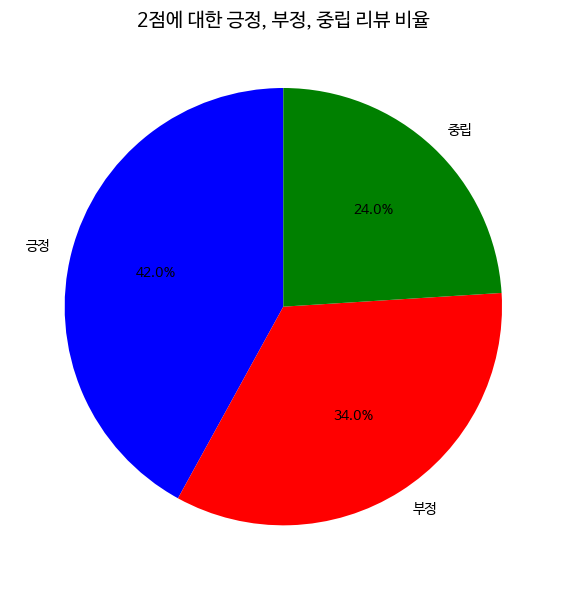

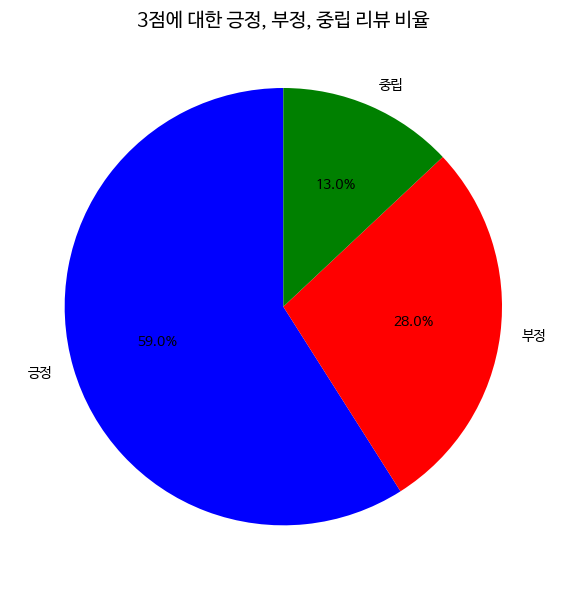

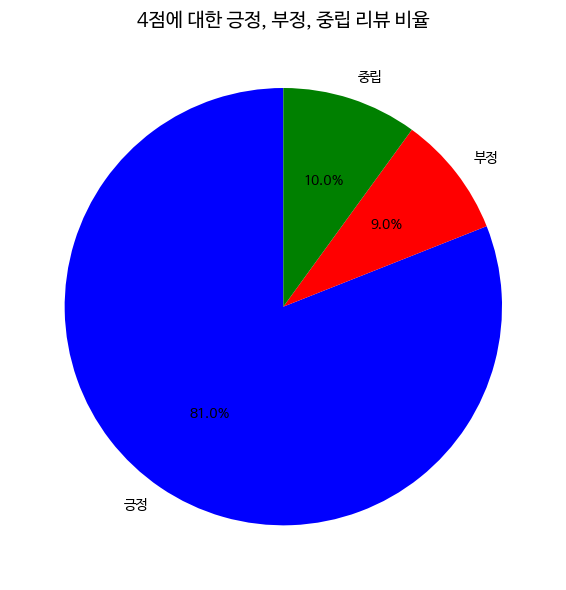

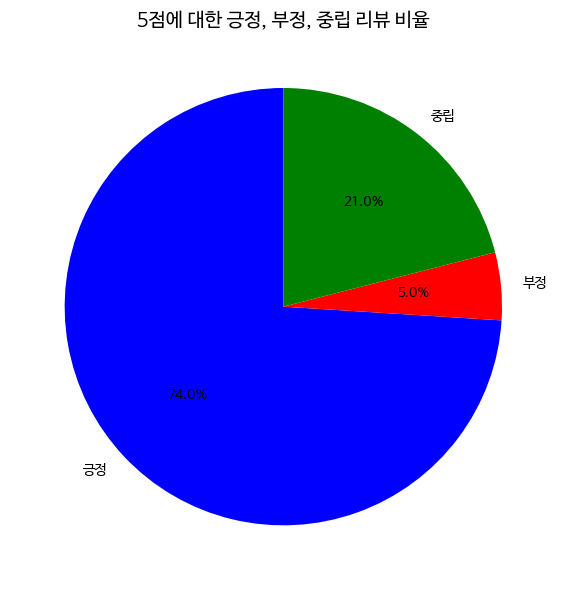

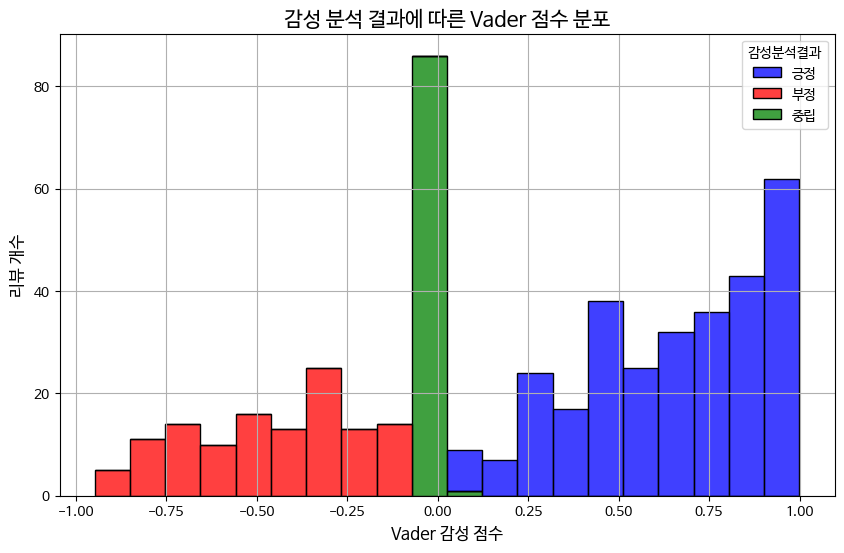

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 경고 메시지 숨기기
warnings.filterwarnings('ignore')

# 시각화 - 막대 그래프
plt.figure(figsize=(10, 6))

# DataFrame의 열 순서를 조정하여 긍정, 부정, 중립의 수치를 올바르게 쌓아올립니다.
sentiment_count.plot(kind='bar', stacked=True, color=['blue', 'red', 'green'], alpha=0.8)  # 부정: 빨강, 중립: 초록, 긍정: 파랑

# 그래프 제목과 라벨
plt.title('별점별 긍정, 부정, 중립 리뷰 개수', fontsize=15)  # 제목
plt.xlabel('별점', fontsize=12)  # x축 라벨
plt.ylabel('리뷰 개수', fontsize=12)  # y축 라벨
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(['긍정', '부정', '중립'], loc='upper right')  # 범례

# 그래프 보여주기
plt.tight_layout()
plt.show()

# 시각화 - 파이 차트
for star in sentiment_count.index:
    plt.figure(figsize=(6, 6))
    sentiment_count.loc[star].plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['blue', 'red', 'green'])  # 긍정: 파랑, 부정: 빨강, 중립: 초록
    plt.title(f'{star}점에 대한 긍정, 부정, 중립 리뷰 비율', fontsize=14)  # 제목
    plt.ylabel('')
    plt.tight_layout()
    plt.show()



# 시각화 - 히스토그램 (중립 포함)
plt.figure(figsize=(10, 6))
sns.histplot(df, x='Varder Score', hue='감성분석결과', multiple='stack', palette={'긍정': 'blue', '부정': 'red', '중립': 'green'}, bins=20)  # 긍정: 파랑, 부정: 빨강, 중립: 초록
plt.title('감성 분석 결과에 따른 Vader 점수 분포', fontsize=15)  # 제목
plt.xlabel('Vader 감성 점수', fontsize=12)  # x축 라벨
plt.ylabel('리뷰 개수', fontsize=12)  # y축 라벨
plt.grid(True)
plt.show()


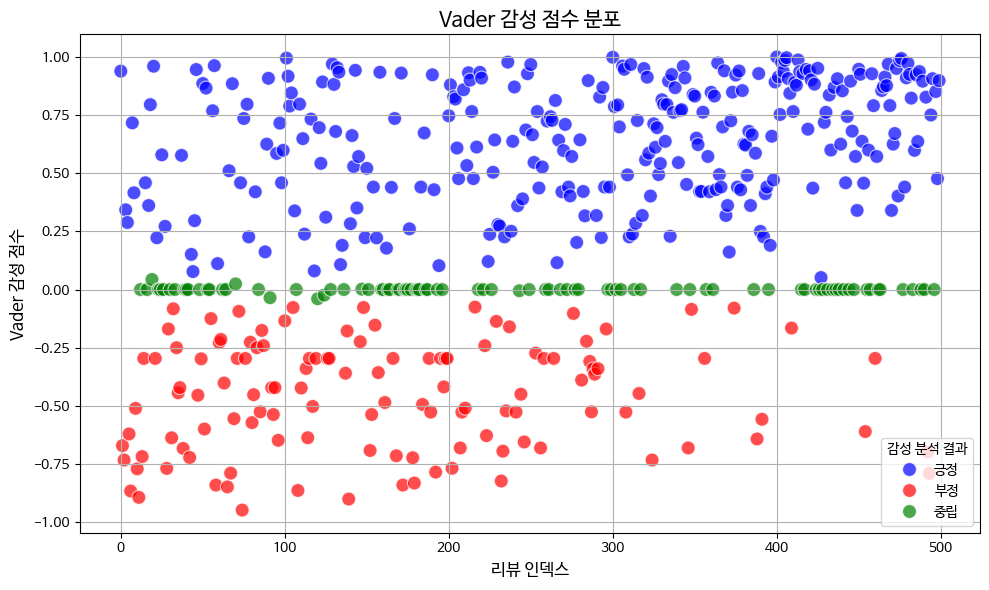

In [24]:
# 시각화 - 산점도 (Varder Score)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y='Varder Score', hue='감성분석결과',
                data=df, palette={'긍정': 'blue', '부정': 'red', '중립': 'green'},
                s=100, alpha=0.7)  # s는 점의 크기, alpha는 투명도

# 그래프 제목과 라벨
plt.title('Vader 감성 점수 분포', fontsize=15)  # 제목
plt.xlabel('리뷰 인덱스', fontsize=12)  # x축 라벨
plt.ylabel('Vader 감성 점수', fontsize=12)  # y축 라벨

plt.legend(title='감성 분석 결과')  # 범례 제목
plt.grid(True)
plt.tight_layout()
plt.show()

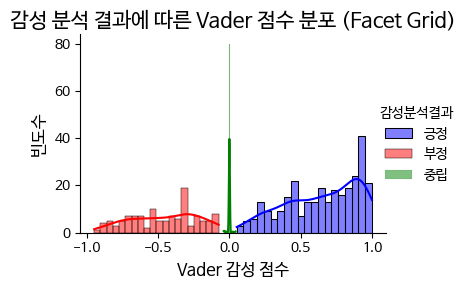

In [31]:
g = sns.FacetGrid(df, hue='감성분석결과', palette={'긍정': 'blue', '부정': 'red', '중립': 'green'})
g.map(sns.histplot, 'Varder Score', bins=20, kde=True)
g.add_legend()
plt.title('감성 분석 결과에 따른 Vader 점수 분포 (Facet Grid)', fontsize=15)
plt.xlabel('Vader 감성 점수', fontsize=12)
plt.ylabel('빈도수', fontsize=12)
plt.tight_layout()
plt.show()


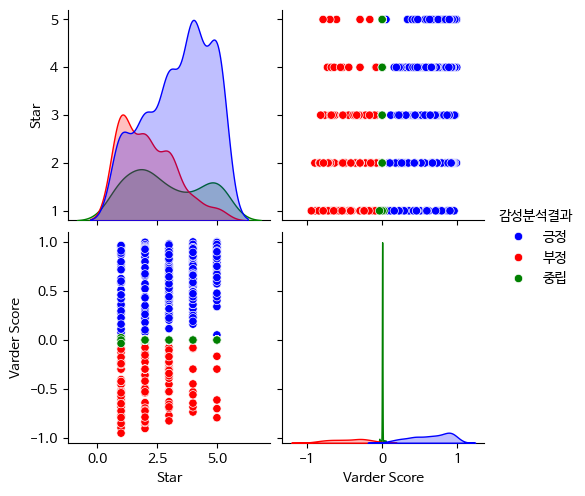

In [35]:
sns.pairplot(df, hue='감성분석결과', palette={'긍정': 'blue', '부정': 'red', '중립': 'green'})

plt.show()
